In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
dataset = pd.read_csv("D:\Data Science\Datasets\combined_data.csv")

In [19]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [20]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size,
                                                                      max_subword_length = 5)

In [21]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [22]:
for i in encoded:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [23]:
for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

In [24]:
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


In [26]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

In [27]:
sentences_padded = pad_sequences(sentences, maxlen = max_length,
                                 padding = padding_type, truncating = trunc_type)

In [28]:
train_size = int(len(sentences) *0.8)

train_sentences = sentences_padded[0:train_size]
train_labels = labels[0:train_size]
test_sentences = sentences_padded[train_size:]
test_labels = labels[train_size:]

train_label_fin = np.array(train_labels)
test_label_fin = np.array(test_labels)

In [29]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16109 (62.93 KB)
Trainable params: 16109 (62.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:
history = model.fit(train_sentences, train_label_fin, epochs = 30, 
                    validation_data = (test_sentences, test_label_fin))

Epoch 1/30
50/50 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5179 - val_loss: 0.6942 - val_accuracy: 0.4436
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5543 - val_loss: 0.6936 - val_accuracy: 0.4662
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5719 - val_loss: 0.6918 - val_accuracy: 0.4812
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6303 - val_loss: 0.6890 - val_accuracy: 0.4937
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.6616 - val_loss: 0.6722 - val_accuracy: 0.5539
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.7225 - val_loss: 0.6535 - val_accuracy: 0.6391
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.7753 - val_loss: 0.6294 - val_accuracy: 0.6942
Epoch 8/30
50/50 [==

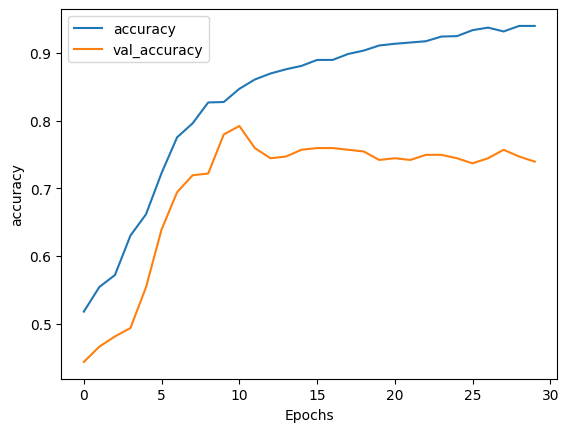

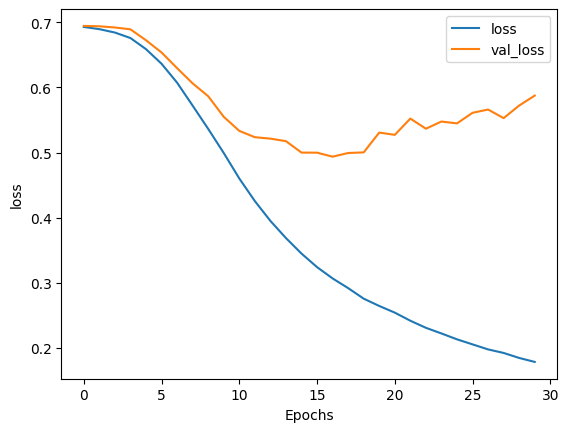

In [34]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')   

VIZ

In [35]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [36]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [37]:
from IPython.display import FileLink
import os

vecs_file = 'vecs.tsv'
meta_file = 'meta.tsv'

if os.path.exists(vecs_file):
    display(FileLink(vecs_file))
else:
    print(f"{vecs_file} not found.")

if os.path.exists(meta_file):
    display(FileLink(meta_file))
else:
    print(f"{meta_file} not found.")

C:\Users\Harivenkat\my_project\hvenv\Data science\vecs.tsv

C:\Users\Harivenkat\my_project\hvenv\Data science\meta.tsv